# Loan Delinquency Prediction

Loan default prediction is one of the most critical and crucial problem faced by financial institutions and organizations as it has a noteworthy effect on the profitability of these institutions. In recent years, there is a tremendous increase in the volume of non – performing loans which results in a jeopardizing effect on the growth of these institutions.
 

Therefore, to maintain a healthy portfolio, the banks put stringent monitoring and evaluation measures in place to ensure timely repayment of loans by borrowers. Despite these measures, a major proportion of loans become delinquent. Delinquency occurs when a borrower misses a payment against his/her loan.

 

Given the information like mortgage details, borrowers related details and payment details, our objective is to identify the delinquency status of loans for the next month given the delinquency status for the previous 12 months (in number of months)

# Imports

In [1]:
#import all the required libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')
import datetime as datetime

#train_test_split
from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import QuantileTransformer

#Evaluation through confusion matrix
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score,
                            roc_auc_score)

# Exploratory Data Analysis

In [2]:
#read the train and test file
data_train = pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [3]:
#check the shape of the data
data_train.shape

(116058, 29)

In [4]:
data_test.shape

(35866, 28)

In [5]:
#check the head dataframe
data_train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [6]:
data_test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#check the details of the data
data_train.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257,0.003197,0.002059,0.001973,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977,0.063354,0.051391,0.055427,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [8]:
#check the details of the test data
data_test.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
count,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000
mean,17933.500000,3.872850,207764.846930,293.130123,67.388334,1.596805,30.762867,769.926504,2.729409,462.436681,0.003178,0.002844,0.002314,0.001952,0.002007,0.002705,0.002370,0.003374,0.003680,0.004322,0.005548,0.006162,0.007333
std,10353.766714,0.460537,114561.745828,89.298799,17.246741,0.490546,9.726146,41.779664,8.029155,381.314899,0.056289,0.060600,0.058991,0.056838,0.059238,0.071770,0.066958,0.086539,0.092898,0.099676,0.121322,0.141455,0.160602
min,1.000000,2.375000,15000.000000,60.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8967.250000,3.500000,119000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17933.500000,3.875000,182000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,742.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26899.750000,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,799.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35866.000000,6.625000,802000.000000,360.000000,97.000000,2.000000,55.000000,839.000000,35.000000,832.000000,1.000000,3.000000,4.000000,5.000000,5.000000,6.000000,6.000000,7.000000,5.000000,6.000000,7.000000,8.000000,9.000000


In [9]:
#check for missing values
data_train.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [10]:
data_test.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
dtype: int64

We can see here, that the train data as well as the test data does not have any missing values.

In [11]:
data_train.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [12]:
data_test.dtypes

loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers           int64
debt_to_income_ratio          int64
borrower_credit_score         int64
loan_purpose                 object
insurance_percent             int64
co-borrower_credit_score      int64
insurance_type                int64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                         

In [13]:
# checkig the details of loan delinquency
data_train['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [14]:
majority_class = data_train.m13.mode()[0]
y_pred = np.full(shape = data_train.m13.shape, fill_value = majority_class)
accuracy_score(data_train.m13, y_pred)

0.9945199813886161

In [15]:
print(classification_report(data_train.m13, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    115422
           1       0.00      0.00      0.00       636

    accuracy                           0.99    116058
   macro avg       0.50      0.50      0.50    116058
weighted avg       0.99      0.99      0.99    116058



We can see that we get perfect recall and precision, but the support values tell us another story. We have 115422 values supporting the m13=0 case, and 636 values supporting m13=1.
Instead of accuracy, let’s find the ROC AUC score. This score measures the ability of our model to distinguish between classes.

In [16]:
roc_auc_score(data_train.m13, y_pred)

0.5

In [17]:
# finding the %age ofloan delinquency
delinquent = (636/115422)*100
print("Percentage of loan delinquency is {:.2f}%".format(delinquent))

Percentage of loan delinquency is 0.55%


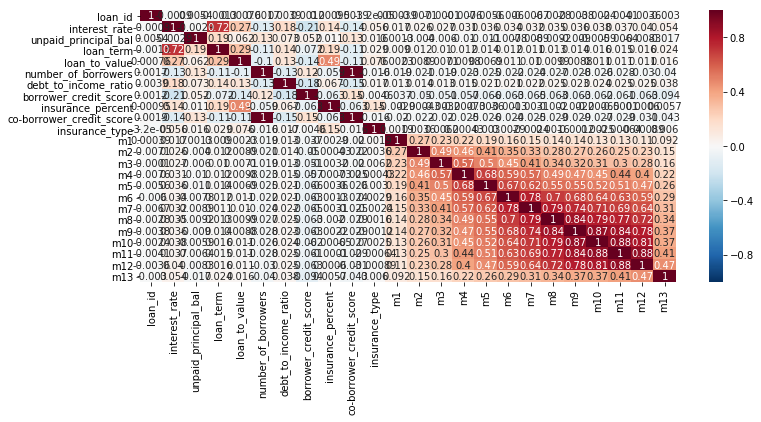

In [18]:
correlation = data_train.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

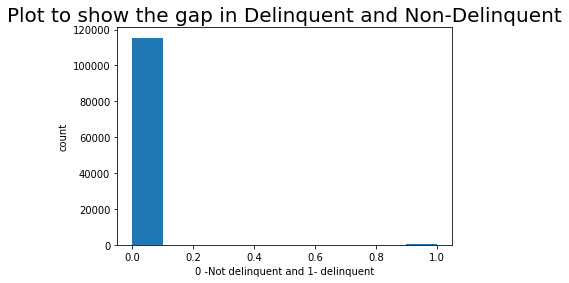

In [19]:
plt.hist(data_train['m13'])
plt.title('Plot to show the gap in Delinquent and Non-Delinquent', fontsize = 20)
plt.xlabel('0 -Not delinquent and 1- delinquent', fontsize = 10)
plt.ylabel('count')
plt.show()

Our analysis completely depicts that it is a case of imbalanced classification. We will use supervised learning methods for solving this problem. Our approach will be to use XGBoost Model to get the best results and then hyper-parameterise it to fetch the best possible f1-score.

To level the playing field for our models, we can over-sample the data set, or under-sample the data set.

# Data Pre-Processing

In [20]:
# saving the loan_id
loan_id = data_test['loan_id']

In [21]:
#drop the unique loan id
data_train.drop('loan_id',axis=1,inplace=True)
data_test.drop('loan_id',axis=1)

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Y,"Sanchez, Hays and Wilkerson",3.625,416000,360,01/02/12,Apr-12,65,2,19,802,C86,0,728,0,0,0,0,0,0,0,0,0,0,0,0,0
6,X,OTHER,3.500,272000,180,01/02/12,Apr-12,77,2,8,777,A23,0,779,0,0,0,0,0,0,0,0,0,0,0,0,0
7,X,OTHER,3.125,160000,120,01/01/12,Mar-12,54,2,18,704,B12,0,803,0,0,0,0,0,0,0,0,0,0,0,0,0
8,X,Thornton-Davis,3.250,236000,180,01/02/12,Apr-12,42,2,33,790,A23,0,799,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Z,Browning-Hart,4.375,98000,360,01/02/12,Apr-12,80,1,36,737,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As a part of data pre-processing we will be handling dates first. We will be generating days since epoch for the columns 'first_payment_date' and 'origination_date'

In [22]:
data_test['first_payment_date']=pd.to_datetime(data_test['first_payment_date'], format='%b-%y').dt.strftime('%m-%Y')

In [23]:
days_since_epoch = pd.to_datetime(data_train['first_payment_date'])- pd.datetime(1970, 1, 1)
data_train['first_payment_date'] = days_since_epoch.dt.days
data_train.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,15461,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,15400,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,Z,Thornton-Davis,3.250,366000,180,2012-01-01,15400,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,X,OTHER,4.750,135000,360,2012-02-01,15431,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,X,OTHER,4.750,124000,360,2012-02-01,15431,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [24]:
days_since_epoch =pd.to_datetime(data_test['first_payment_date'])- pd.datetime(1970, 1, 1)
data_test['first_payment_date'] = days_since_epoch.dt.days
data_test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,15431,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,15431,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,15400,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,15431,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,15431,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
days_since_epoch = pd.to_datetime(data_train['origination_date'])- pd.datetime(1970, 1, 1)
data_train['origination_date'] = days_since_epoch.dt.days
data_train.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,15400,15461,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Y,"Swanson, Newton and Miller",4.875,144000,360,15340,15400,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,Z,Thornton-Davis,3.250,366000,180,15340,15400,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,X,OTHER,4.750,135000,360,15371,15431,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,X,OTHER,4.750,124000,360,15371,15431,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [26]:
days_since_epoch =pd.to_datetime(data_test['origination_date'])- pd.datetime(1970, 1, 1)
data_test['origination_date'] = days_since_epoch.dt.days
data_test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,15341,15431,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,15341,15431,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,15340,15400,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,15341,15431,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,15341,15431,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
def frequency_encoder(df,var):
    frequency=pd.value_counts(df[var], normalize = True)
    prob_labels = frequency.to_dict()
    df[var] = df[var].map(prob_labels)

In [28]:
frequency_encoder(data_train,'source')

In [29]:
frequency_encoder(data_test,'source')

In [30]:
frequency_encoder(data_train,'loan_purpose')

In [31]:
frequency_encoder(data_test,'loan_purpose')

In [32]:
data_train.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,0.126196,"Turner, Baldwin and Rhodes",4.250,214000,360,15400,15461,95,1.0,22.0,694.0,0.243094,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0.323580,"Swanson, Newton and Miller",4.875,144000,360,15340,15400,72,1.0,44.0,697.0,0.253175,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0.126196,Thornton-Davis,3.250,366000,180,15340,15400,49,1.0,33.0,780.0,0.253175,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.550225,OTHER,4.750,135000,360,15371,15431,46,2.0,44.0,633.0,0.253175,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,0.550225,OTHER,4.750,124000,360,15371,15431,80,1.0,43.0,681.0,0.243094,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [33]:
data_test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,0.324904,Browning-Hart,3.875,417000,360,15341,15431,75,1,20,790,0.498857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.549657,OTHER,4.500,113000,360,15341,15431,80,2,33,793,0.244716,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0.324904,OTHER,4.500,72000,360,15340,15400,75,1,34,710,0.244716,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0.549657,"Miller, Mcclure and Allen",4.125,123000,180,15341,15431,41,2,24,798,0.498857,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0.549657,Browning-Hart,3.250,166000,180,15341,15431,53,2,12,767,0.498857,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
data_train.drop('financial_institution',axis=1,inplace=True)

In [35]:
data_test.drop('financial_institution',axis=1,inplace=True)

In [36]:
data_train.columns

Index(['source', 'interest_rate', 'unpaid_principal_bal', 'loan_term', 'origination_date', 'first_payment_date', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'], dtype='object')

In [37]:
data_test.columns

Index(['loan_id', 'source', 'interest_rate', 'unpaid_principal_bal', 'loan_term', 'origination_date', 'first_payment_date', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'], dtype='object')

# Data Split and Feature Engineering

In [38]:
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


In [39]:
X = data_train.drop(['m13'], axis = 1)
y = data_train.m13
rus = RandomUnderSampler(sampling_strategy=0.8)
X_res, y_res = rus.fit_resample(X, y)
print(X_res.shape, y_res.shape)
print(pd.value_counts(y_res))

(1431, 26) (1431,)
0    795
1    636
dtype: int64


In [40]:
cols_numeric = ['source',
                'interest_rate', 
                'unpaid_principal_bal', 
                'loan_term',
                'origination_date', 
                'first_payment_date', 
                'loan_to_value', 
                'number_of_borrowers', 
                'debt_to_income_ratio', 
                'borrower_credit_score', 
                'loan_purpose', 
                'insurance_percent', 
                'co-borrower_credit_score', 
                'insurance_type', 
                'm1', 
                'm2', 
                'm3', 
                'm4', 
                'm5', 
                'm6', 
                'm7', 
                'm8', 
                'm9', 
                'm10', 
                'm11', 
                'm12']
df_rus = pd.DataFrame(X_res, columns = cols_numeric)
df_rus.head()

,source,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0.550225,4.375,139000.0,240.0,15400.0,15461.0,64.0,2.0,40.0,717.0,0.243094,0.0,772.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.550225,4.000,138000.0,360.0,15371.0,15431.0,80.0,1.0,27.0,744.0,0.243094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.550225,3.125,125000.0,180.0,15371.0,15431.0,77.0,1.0,37.0,795.0,0.503731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.550225,4.000,198000.0,300.0,15371.0,15431.0,73.0,2.0,22.0,808.0,0.253175,0.0,809.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.550225,4.000,194000.0,360.0,15371.0,15431.0,90.0,1.0,23.0,779.0,0.243094,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now let’s split the dataset into 3 parts — training, validation, and test datasets. The validation dataset we can use again and again with different models. Once we think we’ve got the best model, we will use our testing dataset.
The reason we do it this way is that our model should not just give us good results with a part of the training dataset, but should also provide good results with data that we have never seen before. This is what will happen in real life. By keeping aside the test dataset to be used only once, we force ourselves to not overfit on the validation dataset. This is what Kaggle competitions do as well.
The trainsize/valsize/testsize show the fraction of the total dataset that should be reserved for training/validation/testing.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
    assert int(train_size + val_size + test_size + 1e-7) == 1
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val,    test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [43]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X_res, y_res, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)

In [44]:
rb=QuantileTransformer(output_distribution='uniform')

In [45]:
X_train=rb.fit_transform(X_train)

In [46]:
X_val=rb.transform(X_val)

In [47]:
X_test=rb.transform(X_test)

# BaseLine XGBoost Model

In [48]:
from xgboost import XGBClassifier

In [49]:
class_weight = {0: 4, 1: 5}
model = XGBClassifier(class_weight=class_weight)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 4, 1: 5},
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Results of various models on validation set.

In [50]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
roc_auc_score(y_val, y_pred)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        84
           1       0.84      0.73      0.78        59

    accuracy                           0.83       143
   macro avg       0.83      0.82      0.82       143
weighted avg       0.83      0.83      0.83       143

accuracy 0.8321678321678322


0.8167877320419693

In [51]:
print('Confusion Matrix for VC: \n',confusion_matrix(y_test, model.predict(X_test)))
print('Accuracy for VC: \n',accuracy_score(y_test, model.predict(X_test)))
print('Precision for VC: \n',precision_score(y_test, model.predict(X_test)))
print('Recall for VC: \n',recall_score(y_test, model.predict(X_test)))
print('f1_score for VC: \n',f1_score(y_test, model.predict(X_test)))

Confusion Matrix for VC: 
 [[66  4]
 [11 63]]
Accuracy for VC: 
 0.8958333333333334
Precision for VC: 
 0.9402985074626866
Recall for VC: 
 0.8513513513513513
f1_score for VC: 
 0.8936170212765957


# Hyper Parameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

Step 1 : Fix learning rate and number of estimators for tuning tree-based parameters

In [62]:
xgb1 = XGBClassifier(learning_rate =0.1,
                     n_estimators=600,
                     max_depth=5, 
                     min_child_weight=1, 
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [63]:
auc = roc_auc_score(y_train, xgb1.predict(X_train))
print("Performance of train : ", auc)

Performance of train :  1.0


In [64]:
auc = roc_auc_score(y_test, xgb1.predict(X_test))
print("Performance of test : ", auc)

Performance of test :  0.8835907335907336


Step 2: Tune max_depth and min_child_weight

In [65]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)}

In [66]:
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=600, 
                                                  max_depth=5,
                                                  min_child_weight=1,
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
                        param_grid = param_test1, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

In [67]:
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.8447193232404636)

In [68]:
# Fix new param with optimal parameter
xgb2 = XGBClassifier(
    learning_rate =0.1, n_estimators=600,
    gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27,
    max_depth = 3,
    min_child_weight = 1
)

In [69]:
# modelfit(xgb1, train, train_X)
xgb2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [70]:
auc = roc_auc_score(y_train, xgb2.predict(X_train))
print("Performance of train : ", auc)

Performance of train :  0.9902736467311575


In [71]:
# Performance sur le test
auc = roc_auc_score(y_test, xgb2.predict(X_test))
print("Performance of test : ", auc)

Performance of test :  0.8625482625482627


Step 3: Tune gamma

In [72]:
param_test3 = { 
    'gamma':[i/10.0 for i in range(0,5)] }

In [73]:
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=600, 
                                                  max_depth = 3,
                                                  min_child_weight = 1,
                                                  gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                        param_grid = param_test3, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

In [74]:
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.4}, 0.8484779146519303)

In [75]:
# Fix new param with optimal parameter
xgb3 = XGBClassifier(
    learning_rate =0.1, 
    n_estimators=600,
    gamma=0.4,
    subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27,
    max_depth = 3,
    min_child_weight = 1
)

In [76]:
# modelfit(xgb1, train, train_X)
xgb3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [77]:
# Performance sur le train
auc = roc_auc_score(y_train, xgb3.predict(X_train))
print("Performance sur le train : ", auc)

Performance sur le train :  0.9902736467311575


In [78]:
# Performance sur le test
auc = roc_auc_score(y_test, xgb3.predict(X_test))
print("Performance sur le test : ", auc)

Performance sur le test :  0.8633204633204633


Step 4: Tune subsample and colsample_bytree

In [79]:
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]}

In [80]:
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=600, 
                                                  max_depth = 3,
                                                  min_child_weight = 1,
                                                  gamma=0.4, 
                                                  subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                        param_grid = param_test4, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

In [81]:
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.9}, 0.8514529678985341)

In [82]:
# Fix new param with optimal parameter
xgb5 = XGBClassifier(
    learning_rate =0.1, 
    n_estimators=600,
    gamma=0.4,
    subsample=0.9,
    colsample_bytree=0.6,
    max_depth = 3,
    min_child_weight = 1,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27
)

In [83]:
xgb5.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.9, verbosity=1)

In [84]:
# Performance sur le train
auc = roc_auc_score(y_train, xgb5.predict(X_train))
print("Performance sur le train : ", auc)

Performance sur le train :  0.9799812668451073


In [85]:
# Performance sur le test
auc = roc_auc_score(y_test, xgb5.predict(X_test))
print("Performance sur le test : ", auc)

Performance sur le test :  0.8911196911196911


Step 6: Reducing Learning Rate in order to reduce overfit

In [86]:
param_test6 = {
 'learning_rate':[i/1000.0 for i in range(5,20,2)]}

In [87]:
gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=600, 
                                                  gamma=0.4,
                                                  subsample=0.9,
                                                  colsample_bytree=0.6,
                                                  max_depth = 3,
                                                  min_child_weight = 1,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                        param_grid = param_test6, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

In [88]:
gsearch6.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.6, gamma=0.4,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=600, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.9, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'learning_rate': [0.005, 0.007, 0.009, 0.011, 0.013,
                                           0.015, 0.017, 0.019]},
             pre_dispatch=

In [89]:
gsearch6.best_params_, gsearch6.best_score_

({'learning_rate': 0.005}, 0.8857373065613248)

# Final Fit and Evaluation

Before making the final fit, I am taking the value of scale_pos_weight as scale_pos_weight = sqrt(count(negative examples)/count(Positive examples)) 

In [169]:
xgb6 = XGBClassifier(
    learning_rate =0.005,
    n_estimators=1000,
    max_depth = 9,
    min_child_weight = 1,
    gamma=0.0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.005,
    objective= 'binary:logistic',
    num_boost_round=999,
    early_stopping_rounds=10,
    nthread=4,
    scale_pos_weight=0.55,
    seed=27
)

In [170]:
xgb6.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=10, gamma=0.0, learning_rate=0.005,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
              n_estimators=1000, n_jobs=1, nthread=4, num_boost_round=999,
              objective='binary:logistic', random_state=0, reg_alpha=0.005,
              reg_lambda=1, scale_pos_weight=0.55, seed=27, silent=None,
              subsample=0.8, verbosity=1)

In [171]:
# Performance sur le train
auc = roc_auc_score(y_train, xgb6.predict(X_train))
print("Performance sur le train : ", auc)

Performance sur le train :  0.9040065379951182


In [172]:
# Performance sur le test
auc = roc_auc_score(y_test, xgb6.predict(X_test))
print("Performance sur le test : ", auc)

Performance sur le test :  0.8708494208494207


In [173]:
print('Confusion Matrix for VC: \n',confusion_matrix(y_test, xgb6.predict(X_test)))
print('Accuracy for VC: \n',accuracy_score(y_test, xgb6.predict(X_test)))
print('Precision for VC: \n',precision_score(y_test, xgb6.predict(X_test)))
print('Recall for VC: \n',recall_score(y_test, xgb6.predict(X_test)))
print('f1_score for VC: \n',f1_score(y_test, xgb6.predict(X_test)))

Confusion Matrix for VC: 
 [[68  2]
 [17 57]]
Accuracy for VC: 
 0.8680555555555556
Precision for VC: 
 0.9661016949152542
Recall for VC: 
 0.7702702702702703
f1_score for VC: 
 0.8571428571428571


# Submission

In [174]:
test = data_test[cols_numeric].values

In [175]:
pred = xgb6.predict(test)
pred[pred<0] = 0
submit = pd.DataFrame({
    'loan_id' : loan_id,
    'm13' : pred
})

In [176]:
submit.to_csv("submission_hyper_tuned_XGBoost.csv", index=False)

In [177]:
submit.describe()

,loan_id,m13
count,35866.000000,35866.000000
mean,17933.500000,0.005939
std,10353.766714,0.076835
min,1.000000,0.000000
25%,8967.250000,0.000000
50%,17933.500000,0.000000
75%,26899.750000,0.000000
max,35866.000000,1.000000
